# VRES: Analysing Spatial Referencing

In [2]:
# Loading all helper functions
import sys
sys.path.insert(0, '..')
from src.models.data_utils import *
from src.models.model_utils import *
from src.models.train_model import *
from src.models.perf_utils import *
from tqdm import tqdm
base_dir = os.getenv("VRES_BASE_DIR", "..")

Experiment 1:
1. Train model to recognise PLSs
2. Run predictions on test data
3. Calculate F1 score metrics


In [21]:
## Training FLS recognition model using DictaSign corpus
!python ../src/recognitionUniqueDictaSign.py --outputName fls \
                                             --epochs 70 \
                                             --batchSize 200 \
                                             --videoSplitMode manual \
                                             --signersTrain 0 1 2 3 4 5 6 7 8 9 10 11\
                                             --signersValid 12 13 \
                                             --signersTest 14 15 \
                                             --rnnNumber 1 \
                                             --rnnHiddenUnits 50\
                                             --seqLength 100 \
                                             --optimizer rms \
                                             --inputType bodyFace_2D_features_hands_OP_HS \
                                             --inputTypeFormat old \
                                             --inputNormed 1 \
                                             --fromNotebook 1 \
                                             --saveGlobalresults ../reports/corpora/DictaSign/recognitionUnique/global/globalUnique.dat \
                                             --savePredictions ../reports/corpora/DictaSign/recognitionUnique/predictions/ \
                                             --saveModels ../models/corpora/DictaSign/recognitionUnique/

Number of videos:

2025-01-27 16:34:02.715687: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']



Train: 72
Valid: 6
Test: 16
Total: 94
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 340)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 200)          204200    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          100400    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 2)            202       
Total params: 304,802
Trainable params: 304,802
Non-trainable params: 0
_________________________________________________________________
Train for 38.0 steps, validate for 1 steps
Epoch 1/70

37/38 [============================>.] - ETA: 0s - loss: 0.4053 - acc: 0.8015 - f1K: 0.2354 - precisionK: 0.4665 - recallK: 0.2087
Epoch 00001: val_f1K improve


37/38 [============================>.] - ETA: 0s - loss: 0.3053 - acc: 0.8378 - f1K: 0.4997 - precisionK: 0.6169 - recallK: 0.4535
Epoch 00004: val_f1K improved from 0.50818 to 0.58260, saving model to ../models/corpora/DictaSign/recognitionUnique/recognitionUniqueDictaSign_fls_173795959-best.hdf5

38/38 [==============================] - 38s 998ms/step - loss: 0.3029 - acc: 0.8392 - f1K: 0.5037 - precisionK: 0.6178 - recallK: 0.4587 - val_loss: 0.4502 - val_acc: 0.7683 - val_f1K: 0.5826 - val_precisionK: 0.6278 - val_recallK: 0.5434
Epoch 5/70

37/38 [============================>.] - ETA: 0s - loss: 0.3097 - acc: 0.8467 - f1K: 0.4987 - precisionK: 0.6107 - recallK: 0.4477
Epoch 00005: val_f1K did not improve from 0.58260

38/38 [==============================] - 38s 1s/step - loss: 0.3104 - acc: 0.8459 - f1K: 0.4980 - precisionK: 0.6128 - recallK: 0.4454 - val_loss: 0.3223 - val_acc: 0.8194 - val_f1K: 0.5470 - val_precisionK: 0.5146 - val_recallK: 0.5838
Epoch 6/70

37/38 [=========

In [27]:
## Training DS recognition model using DictaSign corpus
!python ../src/recognitionUniqueDictaSign.py --outputName DS \
                                             --epochs 70 \
                                             --batchSize 200 \
                                             --videoSplitMode manual \
                                             --signersTrain 0 1 2 3 4 5 6 7 8 9 10 11\
                                             --signersValid 12 13 \
                                             --signersTest 14 15 \
                                             --rnnNumber 1 \
                                             --rnnHiddenUnits 50\
                                             --seqLength 100 \
                                             --optimizer rms \
                                             --inputType bodyFace_2D_features_hands_OP_HS \
                                             --inputTypeFormat old \
                                             --inputNormed 1 \
                                             --fromNotebook 1 \
                                             --saveGlobalresults ../reports/corpora/DictaSign/recognitionUnique/global/globalUnique.dat \
                                             --savePredictions ../reports/corpora/DictaSign/recognitionUnique/predictions/ \
                                             --saveModels ../models/corpora/DictaSign/recognitionUnique/

Number of videos:
Train: 72
Valid: 6
Test: 16
Total: 94
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 340)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 200)          204200    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          100400    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 2)            202       
Total params: 304,802
Trainable params: 304,802
Non-trainable params: 0
_________________________________________________________________
Train for 38.0 steps, validate for 1 steps
Epoch 1/70

27/38 [====================>.........] - ETA: 11s - loss: 0.2481 - acc: 0.9088 - f1K: 0.0401 - precisionK: 0.2774 - recallK: 0.0522


2025-01-26 19:30:24.098418: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']


37/38 [============================>.] - ETA: 1s - loss: 0.2230 - acc: 0.9203 - f1K: 0.0466 - precisionK: 0.3420 - recallK: 0.0478
Epoch 00001: val_f1K improved from -inf to 0.00000, saving model to ../models/corpora/DictaSign/recognitionUnique/recognitionUniqueDictaSign_DS_173788376-best.hdf5

38/38 [==============================] - 39s 1s/step - loss: 0.2206 - acc: 0.9217 - f1K: 0.0479 - precisionK: 0.3387 - recallK: 0.0481 - val_loss: 0.2393 - val_acc: 0.9387 - val_f1K: 0.0000e+00 - val_precisionK: 0.0000e+00 - val_recallK: 0.0000e+00
Epoch 2/70

37/38 [============================>.] - ETA: 0s - loss: 0.1893 - acc: 0.9348 - f1K: 0.0954 - precisionK: 0.5174 - recallK: 0.0555
Epoch 00002: val_f1K improved from 0.00000 to 0.01648, saving model to ../models/corpora/DictaSign/recognitionUnique/recognitionUniqueDictaSign_DS_173788376-best.hdf5

38/38 [==============================] - 37s 969ms/step - loss: 0.1884 - acc: 0.9348 - f1K: 0.0993 - precisionK: 0.5218 - recallK: 0.0579 - val_


37/38 [============================>.] - ETA: 1s - loss: 0.1526 - acc: 0.9417 - f1K: 0.2044 - precisionK: 0.6354 - recallK: 0.1366
Epoch 00004: val_f1K did not improve from 0.01648

38/38 [==============================] - 39s 1s/step - loss: 0.1516 - acc: 0.9423 - f1K: 0.2058 - precisionK: 0.6406 - recallK: 0.1371 - val_loss: 0.0748 - val_acc: 0.9823 - val_f1K: 0.0000e+00 - val_precisionK: 0.0000e+00 - val_recallK: 0.0000e+00
Epoch 5/70

37/38 [============================>.] - ETA: 1s - loss: 0.1386 - acc: 0.9485 - f1K: 0.2248 - precisionK: 0.6377 - recallK: 0.1632
Epoch 00005: val_f1K did not improve from 0.01648

38/38 [==============================] - 40s 1s/step - loss: 0.1393 - acc: 0.9480 - f1K: 0.2244 - precisionK: 0.6366 - recallK: 0.1623 - val_loss: 0.2537 - val_acc: 0.9306 - val_f1K: 0.0156 - val_precisionK: 0.2895 - val_recallK: 0.0080
Epoch 6/70

37/38 [============================>.] - ETA: 1s - loss: 0.1374 - acc: 0.9471 - f1K: 0.2407 - precisionK: 0.5999 - recallK: 0

In [11]:
## Training PT recognition model using DictaSign corpus
!python ../src/recognitionUniqueDictaSign.py --outputName PT \
                                             --epochs 70 \
                                             --batchSize 200 \
                                             --videoSplitMode manual \
                                             --signersTrain 0 1 2 3 4 5 6 7 8 9 10 11\
                                             --signersValid 12 13 \
                                             --signersTest 14 15 \
                                             --rnnNumber 1 \
                                             --rnnHiddenUnits 50\
                                             --seqLength 100 \
                                             --optimizer rms \
                                             --inputType bodyFace_2D_features_hands_OP_HS \
                                             --inputTypeFormat old \
                                             --inputNormed 1 \
                                             --fromNotebook 1 \
                                             --saveGlobalresults ../reports/corpora/DictaSign/recognitionUnique/global/globalUnique.dat \
                                             --savePredictions ../reports/corpora/DictaSign/recognitionUnique/predictions/ \
                                             --saveModels ../models/corpora/DictaSign/recognitionUnique/

Number of videos:
Train: 72
Valid: 6
Test: 16
Total: 94
Model: "model"

2025-01-29 16:13:27.428824: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 340)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 200)          204200    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          100400    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 2)            202       
Total params: 304,802
Trainable params: 304,802
Non-trainable params: 0
_________________________________________________________________
Train for 38.0 steps, validate for 1 steps
Epoch 1/100

37/38 [============================>.] - ETA: 1s - loss: 0.1178 - acc: 0.9683 - f1K: 0.0014 - precisionK: 7.3228e-04 - recallK: 0.0109
Epoch 00001: val_f1K improved from -inf to 0.00000, saving model to ../model

37/38 [============================>.] - ETA: 1s - loss: 0.0909 - acc: 0.9752 - f1K: 0.0194 - precisionK: 0.0978 - recallK: 0.0114
Epoch 00004: val_f1K did not improve from 0.00000

38/38 [==============================] - 39s 1s/step - loss: 0.0916 - acc: 0.9750 - f1K: 0.0202 - precisionK: 0.1048 - recallK: 0.0117 - val_loss: 0.0841 - val_acc: 0.9826 - val_f1K: 0.0000e+00 - val_precisionK: 0.0000e+00 - val_recallK: 0.0000e+00
Epoch 5/100

37/38 [============================>.] - ETA: 1s - loss: 0.0681 - acc: 0.9810 - f1K: 0.0260 - precisionK: 0.2550 - recallK: 0.0148
Epoch 00005: val_f1K improved from 0.00000 to 0.00858, saving model to ../models/corpora/DictaSign/recognitionUnique/recognitionUniqueDictaSign_PT_173813113-best.hdf5

38/38 [==============================] - 40s 1s/step - loss: 0.0668 - acc: 0.9814 - f1K: 0.0287 - precisionK: 0.2599 - recallK: 0.0164 - val_loss: 0.0964 - val_acc: 0.9769 - val_f1K: 0.0086 - val_precisionK: 1.0000 - val_recallK: 0.0043
Epoch 6/100

37/38 [

In [29]:
## Training FBuoy recognition model using DictaSign corpus
!python ../src/recognitionUniqueDictaSign.py --outputName FBUOY \
                                             --epochs 70 \
                                             --batchSize 200 \
                                             --videoSplitMode manual \
                                             --signersTrain 0 1 2 3 4 5 6 7 8 9 10 11\
                                             --signersValid 12 13 \
                                             --signersTest 14 15 \
                                             --rnnNumber 1 \
                                             --rnnHiddenUnits 50\
                                             --seqLength 100 \
                                             --optimizer rms \
                                             --inputType bodyFace_2D_features_hands_OP \
                                             --inputTypeFormat old \
                                             --inputNormed 1 \
                                             --fromNotebook 1 \
                                             --saveGlobalresults ../reports/corpora/DictaSign/recognitionUnique/global/globalUnique.dat \
                                             --savePredictions ../reports/corpora/DictaSign/recognitionUnique/predictions/ \
                                             --saveModels ../models/corpora/DictaSign/recognitionUnique/

Number of videos:

2025-01-26 20:58:10.471143: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']



Train: 72
Valid: 6
Test: 16
Total: 94
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 218)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 200)          131000    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          100400    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 2)            202       
Total params: 231,602
Trainable params: 231,602
Non-trainable params: 0
_________________________________________________________________
Train for 38.0 steps, validate for 1 steps
Epoch 1/70

37/38 [============================>.] - ETA: 0s - loss: 0.0932 - acc: 0.9708 - f1K: 8.3336e-04 - precisionK: 4.3050e-04 - recallK: 0.0130
Epoch 00001: val_f1K


37/38 [============================>.] - ETA: 0s - loss: 0.0642 - acc: 0.9850 - f1K: 0.0075 - precisionK: 0.0746 - recallK: 0.0041
Epoch 00002: val_f1K did not improve from 0.00000

38/38 [==============================] - 37s 973ms/step - loss: 0.0645 - acc: 0.9847 - f1K: 0.0073 - precisionK: 0.0727 - recallK: 0.0040 - val_loss: 0.0532 - val_acc: 0.9905 - val_f1K: 0.0000e+00 - val_precisionK: 0.0000e+00 - val_recallK: 0.0000e+00
Epoch 3/70

37/38 [============================>.] - ETA: 0s - loss: 0.0623 - acc: 0.9843 - f1K: 0.0169 - precisionK: 0.1741 - recallK: 0.0099
Epoch 00003: val_f1K did not improve from 0.00000

38/38 [==============================] - 38s 989ms/step - loss: 0.0625 - acc: 0.9843 - f1K: 0.0165 - precisionK: 0.1695 - recallK: 0.0097 - val_loss: 0.1100 - val_acc: 0.9830 - val_f1K: 0.0000e+00 - val_precisionK: 0.0000e+00 - val_recallK: 0.0000e+00
Epoch 4/70

37/38 [============================>.] - ETA: 1s - loss: 0.0539 - acc: 0.9850 - f1K: 0.0164 - precisionK: 0

In [6]:
import numpy as np

# Load the .npz file
file_path = '../reports/corpora/DictaSign/recognitionUnique/predictions/recognitionUniqueDictaSign_PT_173768212.npz'
data = np.load(file_path)

# Loop through the arrays in the .npz file
for array_name in data.files:
    array_data = data[array_name]
    print(f"Array: {array_name}, Shape: {array_data.shape}")
    
    # Check if the array is 3D, and reshape if necessary
    if array_data.ndim == 3:
        # Flatten the 3D array into 2D (you can adjust this depending on how you want to reshape it)
        # Here, we'll reshape it into (size1 * size2, size3) to flatten the first two dimensions
        array_data = array_data.reshape(-1, array_data.shape[-1])
    
    # Save the reshaped data to CSV
    # np.savetxt(f"../reports/corpora/DictaSign/recognitionUnique/predictions/{array_name}.csv", array_data, delimiter=",")

Array: true, Shape: (205200, 2)
Array: pred, Shape: (1, 205200, 2)
Array: idxTest, Shape: (16,)
Array: separation, Shape: ()


ValueError: Expected 1D or 2D array, got 0D array instead

Experiment 2:
1. Extract features from new dataset
2. Run new dataset through a trained model
3. Verify predictions


In [2]:
# Load the Trained Models
from tensorflow.keras.models import load_model

FLSmodel_path = r"models\corpora\DictaSign\recognitionUnique\recognitionUniqueDictaSign_fls_173795959-best.hdf5"
PTmodel_path = r"models\corpora\DictaSign\recognitionUnique\recognitionUniqueDictaSign_PT_173768212-best.hdf5"
DSmodel_path = r"models\corpora\DictaSign\recognitionUnique\recognitionUniqueDictaSign_DS_173788376-best.hdf5"
FBUOYmodel_path = r"models\corpora\DictaSign\recognitionUnique\recognitionUniqueDictaSign_FBUOY_173788903-best.hdf5"

FLSmodel = load_model(
    os.path.join(base_dir, FLSmodel_path),
    custom_objects={
        'f1K': f1K,
        'precisionK': precisionK,
        'recallK': recallK
    }
)

PTmodel = load_model(
    os.path.join(base_dir, PTmodel_path),
    custom_objects={
        'f1K': f1K,
        'precisionK': precisionK,
        'recallK': recallK
    }
)

DSmodel = load_model(
    os.path.join(base_dir, DSmodel_path),
    custom_objects={
        'f1K': f1K,
        'precisionK': precisionK,
        'recallK': recallK
    }
)

FBUOYmodel = load_model(
    os.path.join(base_dir, FBUOYmodel_path),
    custom_objects={
        'f1K': f1K,
        'precisionK': precisionK,
        'recallK': recallK
    }
)

FBUOYmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 218)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 200)          131000    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 100)          100400    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 2)            202       
Total params: 231,602
Trainable params: 231,602
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Load new features to test the model
import numpy as np

# Load precomputed features BF1n_bodyFace_2D_features_hands_OP_HS (shape: [N, 337])
extracted_features_path = os.path.join(base_dir, r"data\processed\BF1n\BF1n_bodyFace_2D_features_hands_OP_HS.npy")
extracted_features_path_BF1n_normalised = os.path.join(base_dir, r"data\processed\BF1n\BF1n_bodyFace_2D_features_hands_OP_HS_normalized.npy")
BF1n_features = np.load(extracted_features_path) 
BF1n_features_normalised = np.load(extracted_features_path_BF1n_normalised)
# Load precomputed features G1n_bodyFace_2D_features_hands_OP (shape: [N, 215])
extracted_features_path2 = os.path.join(base_dir, r"data\processed\G1n\G1n_bodyFace_2D_features_hands_OP_normalized.npy")
G1n_features = np.load(extracted_features_path2)
# Load precomputed features G1n_bodyFace_2D_features_hands_OP_HS (shape: [N, 337])
extracted_features_path2b = os.path.join(base_dir, r"data\processed\G1n\G1n_bodyFace_2D_features_hands_OP_HS_normalized.npy")
G1n_features2 = np.load(extracted_features_path2b)
# Load BF5n features
extracted_features_path3 = os.path.join(base_dir, r"data\processed\BF5n\BF5n_bodyFace_2D_features_hands_OP_HS_normalized.npy")
BF5n_features = np.load(extracted_features_path3)
# Load BF24n features
extracted_features_path4 = os.path.join(base_dir, r"data\processed\BF24n\BF24n_bodyFace_2D_features_hands_OP_HS_normalized.npy")
BF24n_features = np.load(extracted_features_path4)




# Step 1: Add a batch dimension to make it 3D: (1, N, nfeatures)
BF1n_features = np.expand_dims(BF1n_features, axis=0)
BF1n_features_normalised = np.expand_dims(BF1n_features_normalised, axis=0)
G1n_features = np.expand_dims(G1n_features, axis=0)
G1n_features2 = np.expand_dims(G1n_features2, axis=0)
BF5n_features = np.expand_dims(BF5n_features, axis=0)
BF24n_features = np.expand_dims(BF24n_features, axis=0)

# Step 2: Pad the feature dimension (axis=2) to match 340/218 (conversion from old format used to train model, to new format of exracted features)
BF1n_features = np.pad(BF1n_features, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 340)
BF1n_features_normalised = np.pad(BF1n_features_normalised, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 340)
G1n_features = np.pad(G1n_features, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 218)
G1n_features2 = np.pad(G1n_features2, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 340)
BF5n_features = np.pad(BF5n_features, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 340)
BF24n_features = np.pad(BF24n_features, ((0, 0), (0, 0), (0, 3)), mode='constant')  # New shape: (1, N, 340)

# Step 3: Adjust sequence length to be a multiple of 100
total_time_steps = (BF1n_features.shape[1] // 100) * 100
total_time_steps2 = (G1n_features.shape[1] // 100) * 100
total_time_steps2b = (G1n_features2.shape[1] // 100) * 100
total_time_steps3 = (BF5n_features.shape[1] // 100) * 100
total_time_steps4 = (BF24n_features.shape[1] // 100) * 100
BF1n_features = BF1n_features[:, :total_time_steps, :]
G1n_features = G1n_features[:, :total_time_steps2, :]
G1n_features2 = G1n_features2[:, :total_time_steps2b, :]
BF5n_features = BF5n_features[:, :total_time_steps3, :]
BF24n_features = BF24n_features[:, :total_time_steps4, :]

# Step 4: Pad time dimension if needed
if BF1n_features.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - BF1n_features.shape[1]), (0, 0))
    BF1n_features = np.pad(BF1n_features, pad_width, mode='constant')
if BF1n_features_normalised.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - BF1n_features_normalised.shape[1]), (0, 0))
    BF1n_features_normalised = np.pad(BF1n_features_normalised, pad_width, mode='constant')
if G1n_features.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - G1n_features.shape[1]), (0, 0))
    G1n_features = np.pad(G1n_features, pad_width, mode='constant')
if G1n_features2.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - G1n_features2.shape[1]), (0, 0))
    G1n_features2 = np.pad(G1n_features2, pad_width, mode='constant')
if BF5n_features.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - BF5n_features.shape[1]), (0, 0))
    BF5n_features = np.pad(BF5n_features, pad_width, mode='constant')
if BF24n_features.shape[1] < 100:
    pad_width = ((0, 0), (0, 100 - BF24n_features.shape[1]), (0, 0))
    BF24n_features = np.pad(BF24n_features, pad_width, mode='constant')

print("Final shape:", BF1n_features.shape)  # Should be (1, 900, 340)
print("Final shape:", BF1n_features_normalised.shape)  # Should be (1, 900, 340)
print("Final shape:", G1n_features.shape)  # Should be (1, 1200, 218)
print("Final shape:", G1n_features2.shape)  # Should be (1, 1200, 340)
print("Final shape:", BF5n_features.shape)  # Should be (1, 900, 340)
print("Final shape:", BF24n_features.shape)  # Should be (1, 900, 340)

Final shape: (1, 900, 340)
Final shape: (1, 900, 340)
Final shape: (1, 1200, 218)
Final shape: (1, 1200, 340)
Final shape: (1, 1500, 340)
Final shape: (1, 1500, 340)


In [34]:
## Run Predictions
# FLS 
FLS_BF1n_predictions = model_predictions(
    model=FLSmodel,
    features=[BF1n_features_normalised, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (FLS or not)
    batch_size=0                   # Process all at once
)

FLS_G1n_predictions = model_predictions(
    model=FLSmodel,
    features=[G1n_features2, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (FLS or not)
    batch_size=0                   # Process all at once
)

FLS_BF5n_predictions = model_predictions(
    model=FLSmodel,
    features=[BF5n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (FLS or not)
    batch_size=0                   # Process all at once
)

FLS_BF24n_predictions = model_predictions(
    model=FLSmodel,
    features=[BF24n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (FLS or not)
    batch_size=0                   # Process all at once
)

# PT
PT_BF1n_predictions = model_predictions(
    model=PTmodel,
    features=[BF1n_features_normalised, []],  # 340 features
    features_type='features',      # Set to 'features' 
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

PT_G1n_predictions = model_predictions(
    model=PTmodel,
    features=[G1n_features2, []],  # 340 features
    features_type='features',      # Set to 'features' 
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

PT_BF5n_predictions = model_predictions(
    model=PTmodel,
    features=[BF5n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

PT_BF24n_predictions = model_predictions(
    model=PTmodel,
    features=[BF24n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

# DS
DS_BF1n_predictions = model_predictions(
    model=DSmodel,
    features=[BF1n_features_normalised, []],  # 340 features
    features_type='features',      # Set to 'features' 
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

DS_G1n_predictions = model_predictions(
    model=DSmodel,
    features=[G1n_features2, []],  # 340 features
    features_type='features',      # Set to 'features' 
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

DS_BF5n_predictions = model_predictions(
    model=DSmodel,
    features=[BF5n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

DS_BF24n_predictions = model_predictions(
    model=DSmodel,
    features=[BF24n_features, []],  # 340 features
    features_type='features',      # Set to 'features'
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

# FBUOY
FBUOY_G1n_predictions = model_predictions(
    model=FBUOYmodel,
    features=[G1n_features, []],  # 218 features
    features_type='features',      # Set to 'features' 
    seq_length=100,                # Match training sequence length
    categories_per_output=[2],     # Binary classification (PT or not)
    batch_size=0                   # Process all at once
)

# Extract probabilities
# BF1n 
BF1n_FLSpredictions = FLS_BF1n_predictions.reshape(-1, 2)  
BF1n_PTpredictions = PT_BF1n_predictions.reshape(-1, 2)  
BF1n_DSpredictions = DS_BF1n_predictions.reshape(-1, 2) 
BF1n_fls_probabilities = BF1n_FLSpredictions[:, 1] 
BF1n_pt_probabilities = BF1n_PTpredictions[:, 1]
BF1n_ds_probabilities = BF1n_DSpredictions[:, 1]
# G1n
G1n_FLSpredictions = FLS_G1n_predictions.reshape(-1, 2)
G1n_PTpredictions = PT_G1n_predictions.reshape(-1, 2) 
G1n_DSpredictions = DS_G1n_predictions.reshape(-1, 2)
G1n_FBUOYpredictions = FBUOY_G1n_predictions.reshape(-1, 2)
G1n_fls_probabilities = G1n_FLSpredictions[:, 1]
G1n_pt_probabilities = G1n_PTpredictions[:, 1]
G1n_ds_probabilities = G1n_DSpredictions[:, 1]
G1n_fbuoy_probabilities = G1n_FBUOYpredictions[:, 1]
# BF5n
BF5n_FLSpredictions = FLS_BF5n_predictions.reshape(-1, 2)
BF5n_PTpredictions = PT_BF5n_predictions.reshape(-1, 2)
BF5n_DSpredictions = DS_BF5n_predictions.reshape(-1, 2)
BF5n_fls_probabilities = BF5n_FLSpredictions[:, 1]
BF5n_pt_probabilities = BF5n_PTpredictions[:, 1]
BF5n_ds_probabilities = BF5n_DSpredictions[:, 1]
# BF24n
BF24n_FLSpredictions = FLS_BF24n_predictions.reshape(-1, 2)
BF24n_PTpredictions = PT_BF24n_predictions.reshape(-1, 2)
BF24n_DSpredictions = DS_BF24n_predictions.reshape(-1, 2)
BF24n_fls_probabilities = BF24n_FLSpredictions[:, 1]
BF24n_pt_probabilities = BF24n_PTpredictions[:, 1]
BF24n_ds_probabilities = BF24n_DSpredictions[:, 1]

# Apply threshold (e.g., 0.5) to get binary labels
# pt_labels = (pt_probabilities > 0.5).astype(int)

# Save probabilities to CSV
np.savetxt(f"../reports/corpora/BSL/BF1n/FLSprobs_norm.csv", BF1n_fls_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF1n/PTprobs_norm.csv", BF1n_pt_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF1n/DSprobs_norm.csv", BF1n_ds_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/G1n/FLSprobs.csv", G1n_fls_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/G1n/PTprobs.csv", G1n_pt_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/G1n/DSprobs.csv", G1n_ds_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/G1n/FBUOYprobs.csv", G1n_fbuoy_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF5n/FLSprobs.csv", BF5n_fls_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF5n/PTprobs.csv", BF5n_pt_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF5n/DSprobs.csv", BF5n_ds_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF24n/FLSprobs.csv", BF24n_fls_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF24n/PTprobs.csv", BF24n_pt_probabilities.squeeze(), delimiter=",")
np.savetxt(f"../reports/corpora/BSL/BF24n/DSprobs.csv", BF24n_ds_probabilities.squeeze(), delimiter=",")


### Compute Metrics
To compare model performance of BSL dataset vs LSF dataset.


NameError: name 'BF1n_dataTrue_FLS' is not defined

In [8]:
import pandas as pd

### BF1n Dataset
# Load ground truth CSV
BF1n_ground_truth = pd.read_csv('../annotations/BF1n.csv')
BF1n_dataTrue_FLS = BF1n_ground_truth['FLS'].to_numpy()[:900]  # For FLS class
BF1n_dataTrue_PT = BF1n_ground_truth['PT'].to_numpy()[:900]  # For PT class
BF1n_dataTrue_DS = BF1n_ground_truth['DS'].to_numpy()[:900]  # For DS class

# Set threshold for positive classification as > 0.25
BF1n_fls_probabilities = (BF1n_fls_probabilities > 0.25).astype(int)
BF1n_pt_probabilities = (BF1n_pt_probabilities > 0.25).astype(int)
BF1n_ds_probabilities = (BF1n_ds_probabilities > 0.25).astype(int)



# For binary classification (FLS)
accuracy = framewiseAccuracy(
    dataTrue=BF1n_dataTrue_FLS, 
    dataPred=BF1n_fls_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF1n_dataTrue_FLS,
    dataPred=BF1n_fls_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"FLS - Framewise Accuracy: {accuracy:.4f}")
print(f"FLS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (PT)
accuracy = framewiseAccuracy(
    dataTrue=BF1n_dataTrue_PT, 
    dataPred=BF1n_pt_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF1n_dataTrue_PT,
    dataPred=BF1n_pt_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"PT - Framewise Accuracy: {accuracy:.4f}")
print(f"PT - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (DS)
accuracy = framewiseAccuracy(
    dataTrue=BF1n_dataTrue_DS, 
    dataPred=BF1n_ds_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF1n_dataTrue_DS,
    dataPred=BF1n_ds_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"DS - Framewise Accuracy: {accuracy:.4f}")
print(f"DS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

FLS - Framewise Accuracy: 0.4167
FLS - Precision: 1.0000, Recall: 0.4160, F1: 0.5876
PT - Framewise Accuracy: 0.8611
PT - Precision: 0.0222, Recall: 0.0122, F1: 0.0157
DS - Framewise Accuracy: 0.9456
DS - Precision: 0.0000, Recall: 0.0000, F1: 0.0000


In [10]:
### BF5n Dataset
# Load ground truth CSV
BF5n_ground_truth = pd.read_csv('../annotations/BF5n.csv')
BF5n_dataTrue_FLS = BF5n_ground_truth['FLS'].to_numpy()[:1500]  # For FLS class
BF5n_dataTrue_PT = BF5n_ground_truth['PT'].to_numpy()[:1500]  # For PT class
BF5n_dataTrue_DS = BF5n_ground_truth['DS'].to_numpy()[:1500]  # For DS class

# Set threshold for positive classification as > 0.25
BF5n_fls_probabilities = (BF5n_fls_probabilities > 0.25).astype(int)
BF5n_pt_probabilities = (BF5n_pt_probabilities > 0.25).astype(int)
BF5n_ds_probabilities = (BF5n_ds_probabilities > 0.25).astype(int)

# For binary classification (FLS)
accuracy = framewiseAccuracy(
    dataTrue=BF5n_dataTrue_FLS, 
    dataPred=BF5n_fls_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF5n_dataTrue_FLS,
    dataPred=BF5n_fls_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"FLS - Framewise Accuracy: {accuracy:.4f}")
print(f"FLS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (PT)
accuracy = framewiseAccuracy(
    dataTrue=BF5n_dataTrue_PT, 
    dataPred=BF5n_pt_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF5n_dataTrue_PT,
    dataPred=BF5n_pt_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"PT - Framewise Accuracy: {accuracy:.4f}")
print(f"PT - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (DS)
accuracy = framewiseAccuracy(
    dataTrue=BF5n_dataTrue_DS, 
    dataPred=BF5n_ds_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF5n_dataTrue_DS,
    dataPred=BF5n_ds_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"DS - Framewise Accuracy: {accuracy:.4f}")
print(f"DS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


SystemExit: Annotation and prediction data should have the same length

In [34]:
### G1n Dataset
# Load ground truth CSV
G1n_ground_truth = pd.read_csv('../annotations/G1n.csv')
G1n_dataTrue_PT = G1n_ground_truth['PT'].to_numpy()[:1200]  # For PT class
G1n_dataTrue_DS = G1n_ground_truth['DS'].to_numpy()[:1200]  # For DS class
G1n_dataTrue_Fbuoy = G1n_ground_truth['FBUOY'].to_numpy()[:1200]  # For FBUOY class

# Set threshold for positive classification as > 0.25
G1n_pt_probabilities = (G1n_pt_probabilities > 0.25).astype(int)
G1n_ds_probabilities = (G1n_ds_probabilities > 0.25).astype(int)
G1n_fbuoy_probabilities = (G1n_fbuoy_probabilities > 0.25).astype(int)

# For binary classification (FBUOY)
accuracy = framewiseAccuracy(
    dataTrue=G1n_dataTrue_Fbuoy, 
    dataPred=G1n_fbuoy_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=G1n_dataTrue_Fbuoy,
    dataPred=G1n_fbuoy_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"FBUOY - Framewise Accuracy: {accuracy:.4f}")
print(f"FBUOY - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (PT)
accuracy = framewiseAccuracy(
    dataTrue=G1n_dataTrue_PT, 
    dataPred=G1n_pt_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=G1n_dataTrue_PT,
    dataPred=G1n_pt_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"PT - Framewise Accuracy: {accuracy:.4f}")
print(f"PT - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (DS)
accuracy = framewiseAccuracy(
    dataTrue=G1n_dataTrue_DS, 
    dataPred=G1n_ds_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=G1n_dataTrue_DS,
    dataPred=G1n_ds_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"DS - Framewise Accuracy: {accuracy:.4f}")
print(f"DS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


FBUOY - Framewise Accuracy: 0.9725
FBUOY - Precision: 0.0000, Recall: 0.0000, F1: 0.0000
PT - Framewise Accuracy: 0.7308
PT - Precision: 0.1287, Recall: 0.1122, F1: 0.1199
DS - Framewise Accuracy: 0.9442
DS - Precision: 0.0000, Recall: 0.0000, F1: 0.0000


In [35]:
### BF24n Dataset
# Load ground truth CSV
BF24n_ground_truth = pd.read_csv('../annotations/BF24n.csv')
BF24n_dataTrue_FLS = BF24n_ground_truth['FLS'].to_numpy()[:1500]  # For FLS class
BF24n_dataTrue_PT = BF24n_ground_truth['PT'].to_numpy()[:1500]  # For PT class
BF24n_dataTrue_DS = BF24n_ground_truth['DS'].to_numpy()[:1500]  # For DS class

# Set threshold for positive classification as > 0.25
BF24n_fls_probabilities = (BF24n_fls_probabilities > 0.25).astype(int)
BF24n_pt_probabilities = (BF24n_pt_probabilities > 0.25).astype(int)
BF24n_ds_probabilities = (BF24n_ds_probabilities > 0.25).astype(int)

# For binary classification (FLS)
accuracy = framewiseAccuracy(
    dataTrue=BF24n_dataTrue_FLS, 
    dataPred=BF24n_fls_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF24n_dataTrue_FLS,
    dataPred=BF24n_fls_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"FLS - Framewise Accuracy: {accuracy:.4f}")
print(f"FLS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (PT)
accuracy = framewiseAccuracy(
    dataTrue=BF24n_dataTrue_PT, 
    dataPred=BF24n_pt_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF24n_dataTrue_PT,
    dataPred=BF24n_pt_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"PT - Framewise Accuracy: {accuracy:.4f}")
print(f"PT - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# For binary classification (DS)
accuracy = framewiseAccuracy(
    dataTrue=BF24n_dataTrue_DS, 
    dataPred=BF24n_ds_probabilities,
    trueIsCat=False,          # Ground truth is 0/1 vector
    predIsCatOrProb=False      # Predictions are probabilities/categorical
)
precision, recall, f1 = framewisePRF1binary(
    dataTrue=BF24n_dataTrue_DS,
    dataPred=BF24n_ds_probabilities,
    trueIsCat=False,
    predIsCatOrProb=False
)
print(f"DS - Framewise Accuracy: {accuracy:.4f}")
print(f"DS - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


FLS - Framewise Accuracy: 0.3867
FLS - Precision: 0.5523, Recall: 0.3129, F1: 0.3995
PT - Framewise Accuracy: 0.8493
PT - Precision: 0.1339, Recall: 0.1278, F1: 0.1308
DS - Framewise Accuracy: 0.9273
DS - Precision: 0.0714, Recall: 0.0656, F1: 0.0684


### Visualisations


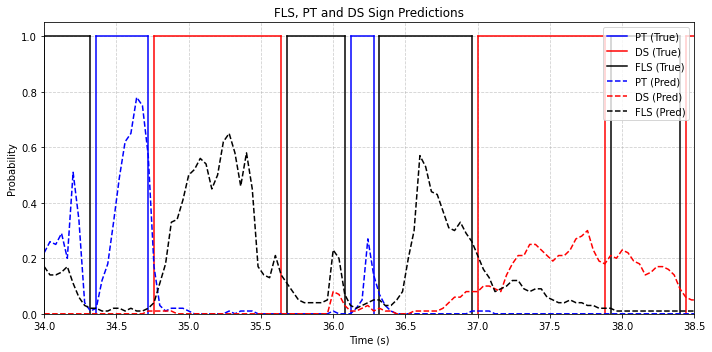

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and filter data
file_path = "../reports/corpora/BSL/BF24n/visualisationsnippet.csv"
df = pd.read_csv(file_path).query("34 <= Time <= 39")

# Extract data
time = df["Time"]
pt_true, ds_true, fls_true = df["PT"], df["DS"], df["FLS"]
pt_pred, ds_pred, fls_pred = df["PT Pred"], df["DS Pred"], df["FLS Pred"]

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))
transition_duration = 0.01  # Duration for both up and down ramps

def plot_trapezoid(ax, time, signal, color, label):
    """Plot signal with trapezoidal transitions including ramp-up and ramp-down"""
    is_active = signal == 1
    active_periods = []
    current_start = None
    
    # Identify active periods
    for i in range(len(signal)):
        if is_active[i] and current_start is None:
            current_start = time.iloc[i]
        elif not is_active[i] and current_start is not None:
            active_periods.append((current_start, time.iloc[i-1]))
            current_start = None
    if current_start is not None:
        active_periods.append((current_start, time.iloc[-1]))

    # Plot each active period with ramps
    for i, (start, end) in enumerate(active_periods):
        duration = end - start
        label_used = label if i == 0 else ""  # Only label first segment
        

        # Full trapezoid with plateau
        up_end = start + transition_duration
        down_start = end - transition_duration
        ax.plot([start, up_end], [0, 1], color=color, label=label_used)
        ax.plot([up_end, down_start], [1, 1], color=color)
        ax.plot([down_start, end], [1, 0], color=color)


# Plot true signals with trapezoidal transitions
plot_trapezoid(ax, time, pt_true, 'blue', 'PT (True)')
plot_trapezoid(ax, time, ds_true, 'red', 'DS (True)')
plot_trapezoid(ax, time, fls_true, 'black', 'FLS (True)')

# Plot predicted signals
ax.plot(time, pt_pred, color="blue", linestyle="dashed", label="PT (Pred)")
ax.plot(time, ds_pred, color="red", linestyle="dashed", label="DS (Pred)")
ax.plot(time, fls_pred, color="black", linestyle="dashed", label="FLS (Pred)")

# Formatting
ax.set(xlim=(34, 38.5), ylim=(0, 1.05),
       ylabel="Probability", xlabel="Time (s)",
       title="FLS, PT and DS Sign Predictions")
ax.legend(loc='upper right')
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()